<a href="https://colab.research.google.com/github/ExponentialDS/Databases/blob/master/Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ECMM466: Social Networks and Text Analysis - Coursework 2
    

###  Name: Chris Finn
### Student Number:  700073315 

In [40]:
# Import libraries 


# For data and matrix manipulation
import pandas as pd
import numpy as np

# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import cufflinks as cf
import plotly.graph_objs as go
#from plotly.plotly import iplot
from pylab import rcParams #---> Library for set the attributes of the figures

# For string manipulation
import re 
import string

# For text pre-processing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


# For assigning sentiment polarity scores
from textblob import TextBlob

# For extracting features -- i.e. the document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

# For splitting the data into a training and a testing set
from sklearn.model_selection import train_test_split

# For using Naive Bayes - the typical basic machine learning algorithm of choice for Text analytics
from sklearn.naive_bayes import MultinomialNB

# For evaluating our machine learning model 
from sklearn.metrics import accuracy_score, classification_report


# Necessary dependencies from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import nltk
from nltk import tokenize
from nltk import word_tokenize
from nltk import WordNetLemmatizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Question 1

### (1.a) Load the Text. Please load the text content from file: DataScience.txt. This is a textual description of ”data science” as obtained from Wikipedia (https://en.wikipedia.org/wiki/Data_science

In [5]:
with open("DS.txt", "r") as file1:
  text = file1.read()
  print(text)

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.

Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of in

### (1.b) Using nltk and its sentence tokenizer, print the different sentences in text. Do you spot anything wrong in the way the tokenizer operates? Motivate your question.

In [6]:
##! pip install nltk

In [7]:
sentences=tokenize.sent_tokenize(text)
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains.',
 'Data science is related to data mining, machine learning and big data.',
 'Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data.',
 'It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.',
 'However, data science is different from computer science and information science.',
 'Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing becaus

 **Analysis**: I see nothing wrong in the way the tokenizer works in this scenario. Manually checking the output, the tokenizer has successfully broken down the text into its individual sentences. That said, Tokenizers can have problems generally in dealing with quotations and abbreviations (i.e. dept. or dr.).
 
     

### (1.c) Using nltk extract word tokens from sentences.

In [8]:
# tokenize words in sentences into lower case
words1 = [word_tokenize(sent.lower()) for sent in sentences]
words2 = [item for sublist in words1 for item in sublist]

In [9]:
words2

['data',
 'science',
 'is',
 'an',
 'interdisciplinary',
 'field',
 'that',
 'uses',
 'scientific',
 'methods',
 ',',
 'processes',
 ',',
 'algorithms',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge',
 'and',
 'insights',
 'from',
 'noisy',
 ',',
 'structured',
 'and',
 'unstructured',
 'data',
 ',',
 'and',
 'apply',
 'knowledge',
 'and',
 'actionable',
 'insights',
 'from',
 'data',
 'across',
 'a',
 'broad',
 'range',
 'of',
 'application',
 'domains',
 '.',
 'data',
 'science',
 'is',
 'related',
 'to',
 'data',
 'mining',
 ',',
 'machine',
 'learning',
 'and',
 'big',
 'data',
 '.',
 'data',
 'science',
 'is',
 'a',
 '``',
 'concept',
 'to',
 'unify',
 'statistics',
 ',',
 'data',
 'analysis',
 ',',
 'informatics',
 ',',
 'and',
 'their',
 'related',
 'methods',
 "''",
 'in',
 'order',
 'to',
 '``',
 'understand',
 'and',
 'analyze',
 'actual',
 'phenomena',
 "''",
 'with',
 'data',
 '.',
 'it',
 'uses',
 'techniques',
 'and',
 'theories',
 'drawn',
 'from',
 'many',
 'fields

In [10]:
# Lemmatize the word tokens from previous step
wnl=WordNetLemmatizer()
words3=[wnl.lemmatize(w) for w in words2]

In [11]:
print(words3)

['data', 'science', 'is', 'an', 'interdisciplinary', 'field', 'that', 'us', 'scientific', 'method', ',', 'process', ',', 'algorithm', 'and', 'system', 'to', 'extract', 'knowledge', 'and', 'insight', 'from', 'noisy', ',', 'structured', 'and', 'unstructured', 'data', ',', 'and', 'apply', 'knowledge', 'and', 'actionable', 'insight', 'from', 'data', 'across', 'a', 'broad', 'range', 'of', 'application', 'domain', '.', 'data', 'science', 'is', 'related', 'to', 'data', 'mining', ',', 'machine', 'learning', 'and', 'big', 'data', '.', 'data', 'science', 'is', 'a', '``', 'concept', 'to', 'unify', 'statistic', ',', 'data', 'analysis', ',', 'informatics', ',', 'and', 'their', 'related', 'method', "''", 'in', 'order', 'to', '``', 'understand', 'and', 'analyze', 'actual', 'phenomenon', "''", 'with', 'data', '.', 'it', 'us', 'technique', 'and', 'theory', 'drawn', 'from', 'many', 'field', 'within', 'the', 'context', 'of', 'mathematics', ',', 'statistic', ',', 'computer', 'science', ',', 'information',

**Analysis**

Both lemmatization and stemming have the same goal in text analysis; reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Lemmatization achieves this in a crude process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Stemming normally targets the removal of inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

Example word: studies

*   Studies when lemmatized becomes studi
*   Studies when stemmed becomes study

Example word: studying
*  Studying when lemmatized becomes study
*  Studying when stemmed becomes study 



### (1.e) Using nltk get rid of stopwords in your lemmatized set of tokens. Briefly report the definition of a stopword and argue whether they can be important for semantic content analysis or stylometry.


In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_w=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
words4=[w for w in words3 if w not in stop_w and w.isalnum()]
words4

['data',
 'science',
 'interdisciplinary',
 'field',
 'us',
 'scientific',
 'method',
 'process',
 'algorithm',
 'system',
 'extract',
 'knowledge',
 'insight',
 'noisy',
 'structured',
 'unstructured',
 'data',
 'apply',
 'knowledge',
 'actionable',
 'insight',
 'data',
 'across',
 'broad',
 'range',
 'application',
 'domain',
 'data',
 'science',
 'related',
 'data',
 'mining',
 'machine',
 'learning',
 'big',
 'data',
 'data',
 'science',
 'concept',
 'unify',
 'statistic',
 'data',
 'analysis',
 'informatics',
 'related',
 'method',
 'order',
 'understand',
 'analyze',
 'actual',
 'phenomenon',
 'data',
 'us',
 'technique',
 'theory',
 'drawn',
 'many',
 'field',
 'within',
 'context',
 'mathematics',
 'statistic',
 'computer',
 'science',
 'information',
 'science',
 'domain',
 'knowledge',
 'however',
 'data',
 'science',
 'different',
 'computer',
 'science',
 'information',
 'science',
 'turing',
 'award',
 'winner',
 'jim',
 'gray',
 'imagined',
 'data',
 'science',
 'fourth',

**Analysis** Stop words are a set of commonly used words in a language. Each language will have its own unique list.   Stop words are commonly used in Text Mining and NLP to remove words that are so commonly used that they carry very little useful information.

One way to improve performance of text analysis algorithms is to reduce the size of the datasets, i.e. if you have less tokens then in theory your model can train on the datasets more quickly. 

Therefore removing stopwords before NLP is common practice by data professionals, but it is not always advisable:

For example, in sentiment analysis removal of stop words in the following sentence produces by the Aruana library (https://pypi.org/project/Aruana/)  “I told you that she was not happy” produces tokens 'told, happy' with a positive score. This would yield a wrong result and reduce the accuracy of the model. 

Additionally in a reasearch paper by Arun R. et al. Reference below. "Stopwords and Stylometry: A Latent Dirichlet Allocation Approach", showed that stopwords had a bigger impact in classification prediction of author styles across documents than meaningful words.

Therfore, if one is doing stylometry and/or sentiment analysis, it might be prudent to limit the use of stopwords removal.


http://clweb.csa.iisc.ac.in/arun_r/papers/nips09-stopwords-and-stylometry.pdf





```
# This is formatted as code
```

### (1.f) Perform a frequency analysis. Identify the 5 most frequent words in the cleaned text (lemmatized,with no stopwords). Using seaborn, produce a bar plot of the frequency distribution for the 20 most frequent words in the cleaned text

In [14]:
words4=[w for w in words3 if w not in stop_w and w.isalnum()]
## Creating FreqDist - Focus on the 30 most common tokens
all_fdist = nltk.FreqDist(words4).most_common(5)
print("The 5 most common words in the cleaned text is")
print(all_fdist)
all_fdist2 = nltk.FreqDist(words4).most_common(20)
all_fdist2 = pd.Series(dict(all_fdist2))




The 5 most common words in the cleaned text is
[('data', 39), ('science', 25), ('statistic', 12), ('field', 6), ('big', 6)]


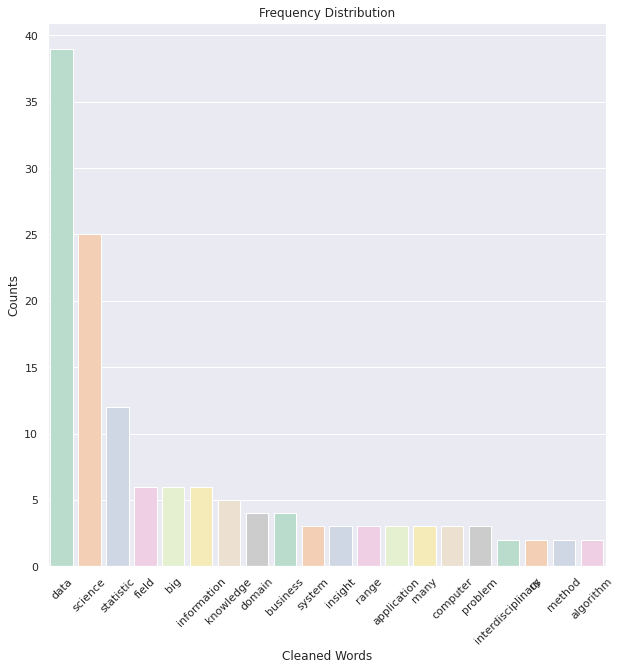

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

frpl1 = sns.barplot(x=all_fdist2.index, y=all_fdist2.values, ax=ax,palette="Pastel2")
plt.xticks(rotation=45);
frpl1.set(xlabel='Cleaned Words', ylabel='Counts', title='Frequency Distribution')
frpl1

### (2.a) Network building. Build the adjacency matrix from co-occurrence links between words in cleaned sentences from the text of the previous part. Perform the construction within networkx, using a Graph class

In [16]:
import seaborn as sns
from pylab import rcParams #---> Library for set the attributes of the figures
sns.set()
rcParams['figure.figsize'] = 17, 20
# tokenize and lowercase the words
nodes1 = [word_tokenize(sent.lower()) for sent in sentences]

#remove stopwords
nodes2=[]
for k in nodes1:
  nodes2.append([w for w in k if w not in stop_w and w.isalnum()])

#Build co-occurence graph network
import networkx as nx
G = nx.Graph()
for sublist in nodes2:
  edlis=[]
  for i in range(len(sublist)-1):
    edlis.append((sublist[i],sublist[i+1]))
  G.add_edges_from(edlis)

Text(0.5, 1.0, 'Co-currence graph of Data Science cleaned text')

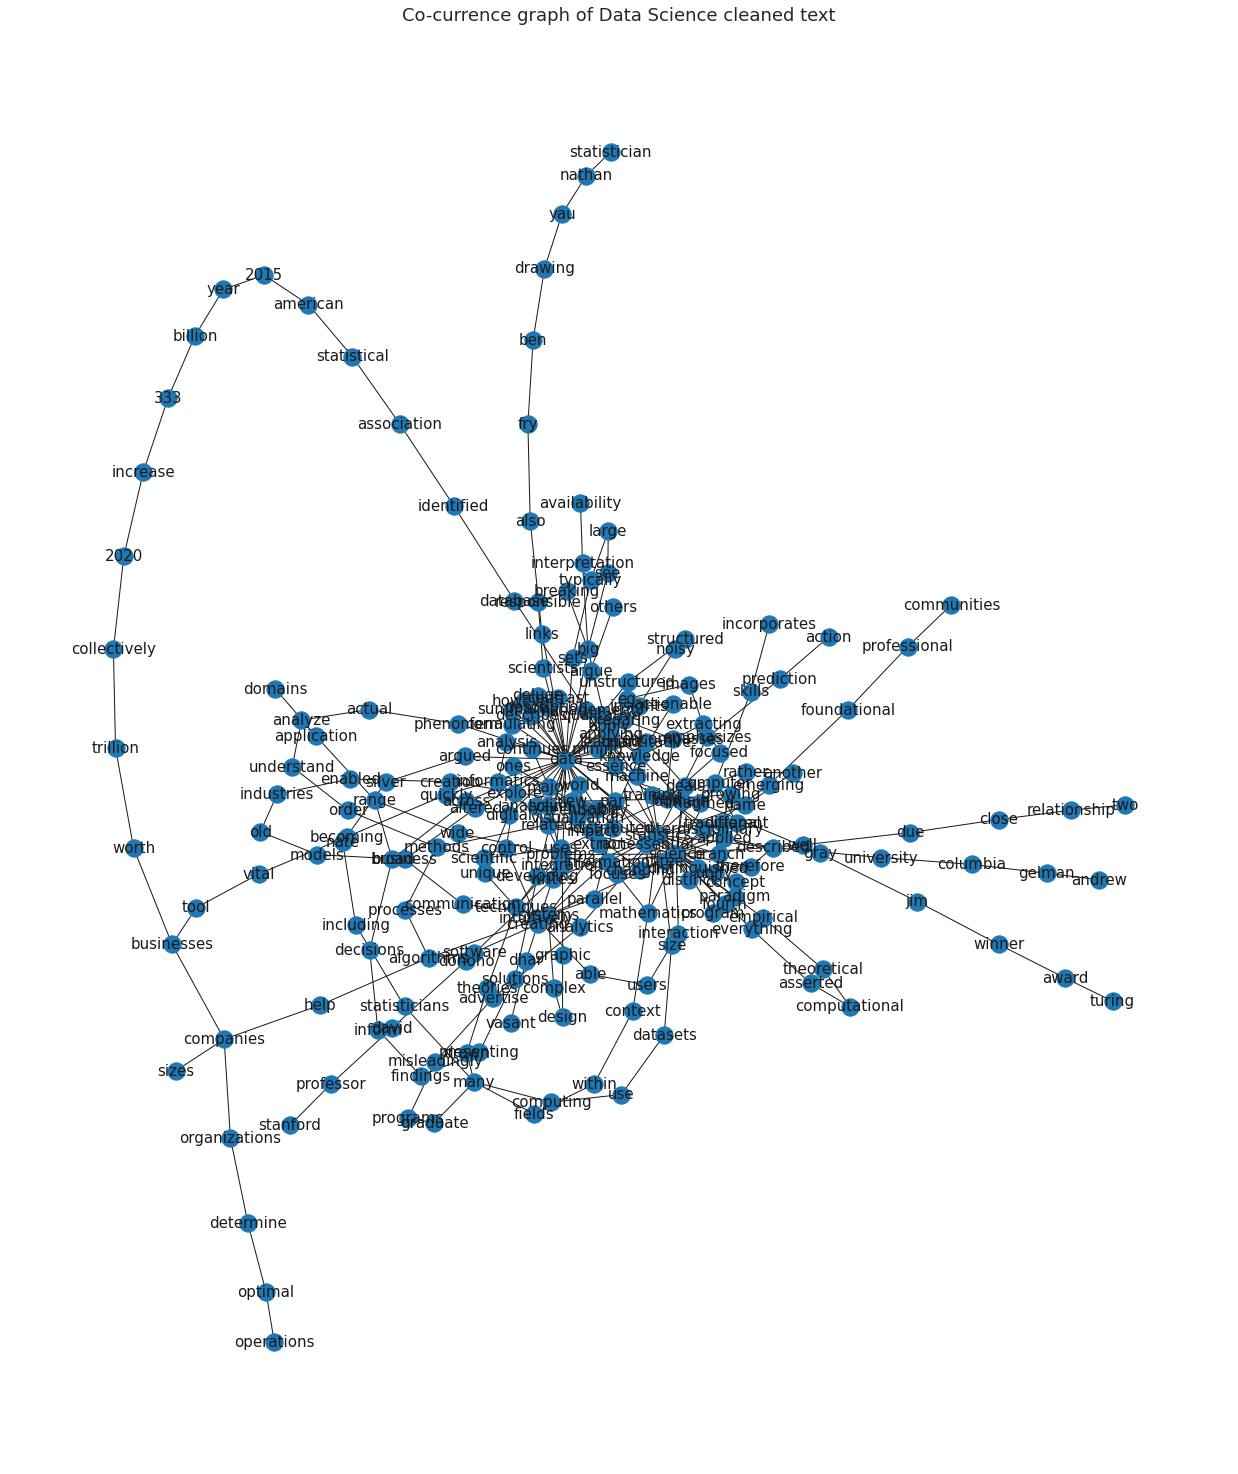

In [22]:
#Draw graph
nx.draw(G, with_labels=True, font_size=15)
plt.title('Co-occurrence graph of Data Science cleaned text', fontsize=18)

In [44]:
print('The number of edges for the network is')
print(G.number_of_edges())
print('The number of nodes for the network is')
print(G.number_of_nodes())

The number of edges for the network is
294
The number of nodes for the network is
227


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


Text(0, 0.5, 'nodes')

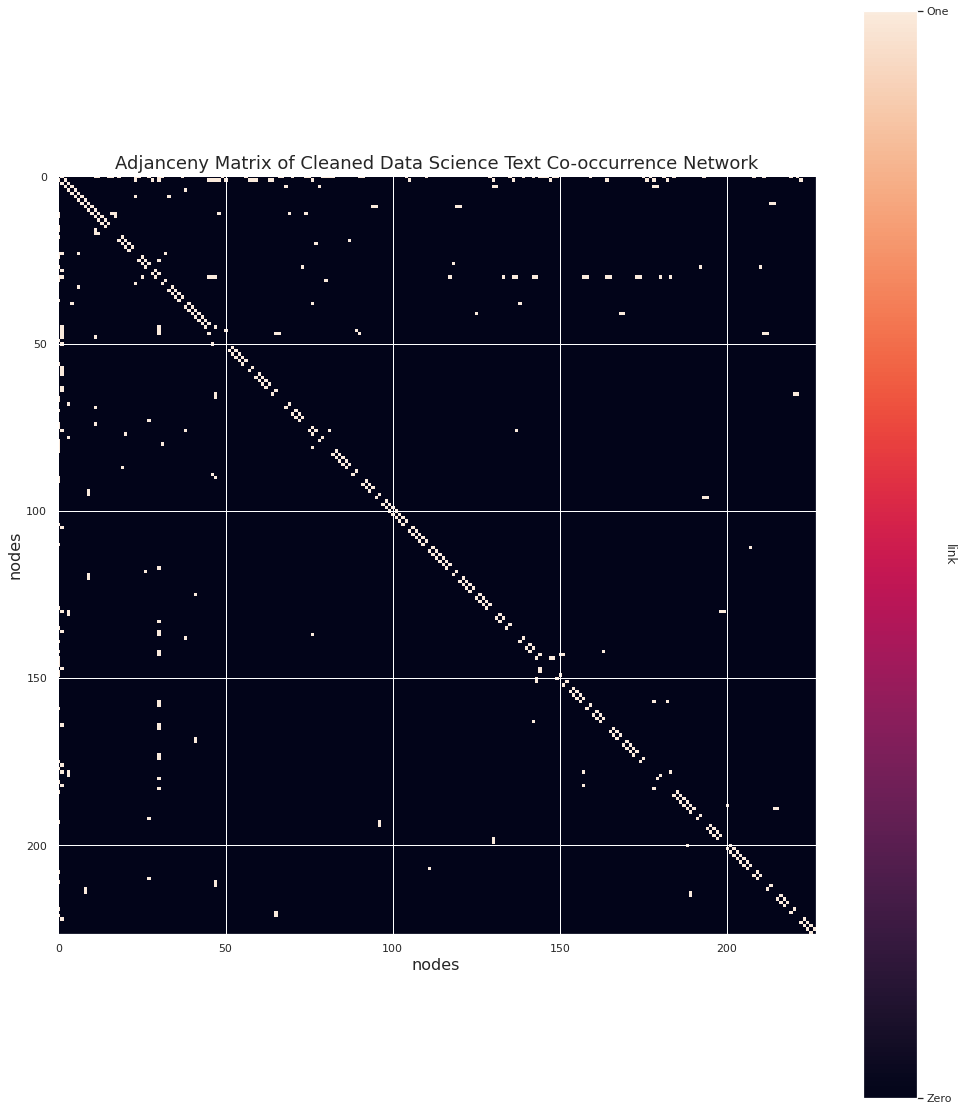

In [33]:
from pylab import rcParams #---> Library for set the attributes of the figures
sns.set()
rcParams['figure.figsize'] = 17, 20
print(nx.to_numpy_matrix(G)) #--> visualize the entire adjacency matrix
plt.imshow(nx.to_numpy_matrix(G)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap
cbar.set_ticks([0,1]) #--> set the range of the color bar
cbar.ax.set_yticklabels(['Zero','One'],) #--> set the label of the number to display in the color bar

cbar.set_label('link', rotation=270) #--> set the label of the color bar and rotate it
plt.title('Adjanceny Matrix of Cleaned Data Science Text Co-occurrence Network', fontsize=18)

plt.xlabel('nodes', fontsize = 16) #--> set the label of the x axis
plt.ylabel('nodes', fontsize = 16) #--> set the label of the y axis




### (2.b) Semantic frame analysis. Define a function semantic_frame(network, target), that gets as input a general Graph and a target word (e.g. a string like ’science’) and produces a network visualisation of the target surrounded by its first neighbours. The function should be visually appealing and include: (i) readable labels of names of nodes, (ii) node sizes proportional to the degree of nodes in the semantic frame/network neighbourhood. Use this function to produce a visualisation of the semantic frame for data in the co-occurrence network.

In [36]:
def semantic_frame(network, target):
    n = target
    #assign Gx network
    net = G
    #Create list of node labels
    nodel = list(network.neighbors(n))
    nodel.append(target)
    #Create subgraph
    sub = network.subgraph(nodel)
    #Calculate degree centrality
    degreecentrality = nx.degree_centrality(sub)
    #Change values to array
    cent = np.fromiter(degreecentrality.values(), float)
    #Set size of the picture
    plt.figure(3, figsize=(12,12))
    #Draw the graph network
    nx.draw(sub, with_labels=True, font_size=15, node_size= cent *2e3, node_color='Coral')

Text(0.5, 1.0, 'Semantic Frame Network Graph with target word Data')

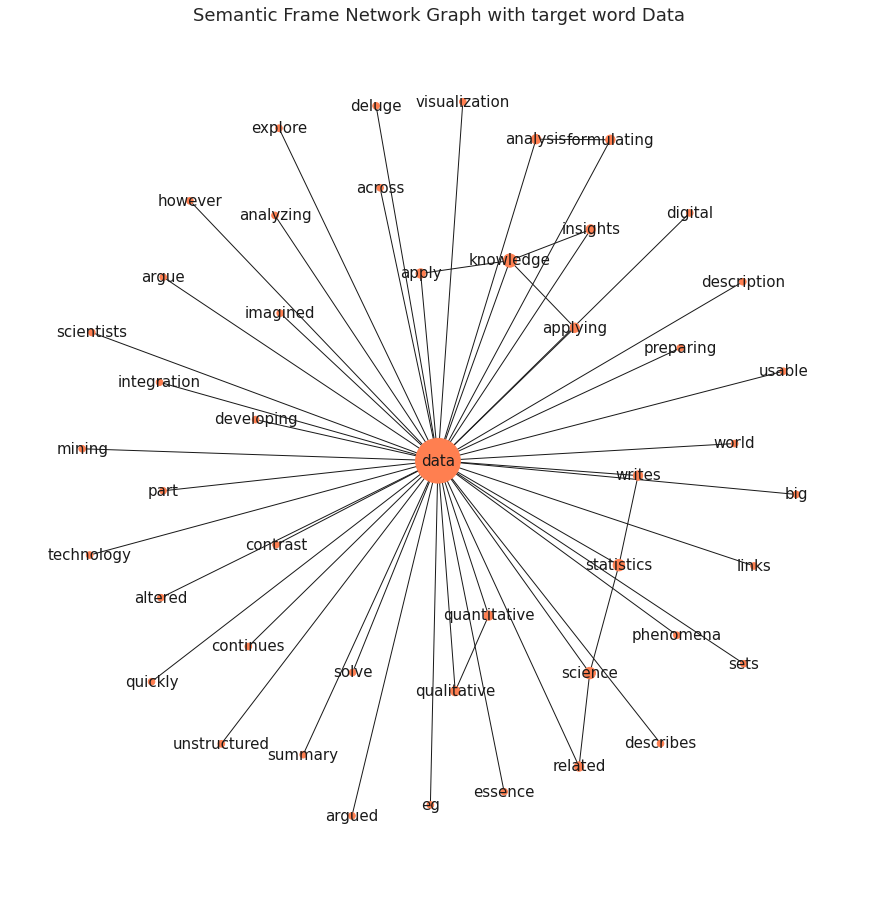

In [37]:
semantic_frame(G, 'data')
plt.title('Semantic Frame Network Graph with target word Data', fontsize = 18)

### (2.c) Semantic content analysis via network metrics. Using pandas, create a data frame including degree centrality, closeness centrality and betweenness of wordsin the whole co-occurrence network. Use this data frame to identify the first 10 concepts with the highest closeness centrality in the network (do the same with the other metrics). In terms of semantic prominence, what does it mean for ’problems’ to have a relatively higher closeness centrality but lower degree compared to other top-ranked words?

In [30]:
#Calculate the centrality values using nx packages
degrees = nx.degree_centrality(G)
clos = nx.closeness_centrality(G)
betw = nx.betweenness_centrality(G)

#Create dataframe which outline the values by word
dataframe = pd.DataFrame([degrees,clos,betw]).transpose()
dataframe.columns = ['Degree', 'Closeness', 'Betweeness']
dataframe.sort_values(by=['Closeness'], inplace=True, ascending=False)
print(dataframe.head(10))

               Degree  Closeness  Betweeness
data         0.203540   0.319661    0.653465
statistics   0.092920   0.292367    0.294377
science      0.110619   0.291990    0.278471
related      0.017699   0.265258    0.051647
writes       0.017699   0.260369    0.052232
knowledge    0.035398   0.256527    0.083883
information  0.035398   0.251111    0.044920
quickly      0.008850   0.251111    0.070092
altered      0.008850   0.249448    0.029985
insights     0.017699   0.249448    0.012661


In [40]:
# Locate problems word
print (dataframe[dataframe.index.str.startswith('prob')])

            Degree  Closeness  Betweeness
problems  0.026549    0.23444    0.044865


**Analysis** The word problems does indeed have a much higher closeness centrality (0.23) vs. degree centrality (0.02). The implications of this result suggest that the word in the studied text has individual ties to hubs or nodes of high importance in the network.

### (2.d) Semantic enrichment. Co-occurrences capture syntactic relationships but their grasp of semantic overlap in meaning is limited. Your line manager asked you to overcome this limitation by considering semantic enrichment. Using the synsets in WordNet from the nltk package, identify synonyms relationships and regularisations between any two lemmas in the list of nodes of your co-occurrence network. Define a MultiGraph object that contains both co-occurrences (e.g. in blue) and semantic links (e.g. in cyan). Comment over the key differences in links between the original and the enriched network as in to report on the results of this approach to your line manager.

Don't understand the question

### (2.e) Semantic frame analysis II. Using the function in step 2.b, define a second function semantic_enriched_frame(network, target) that takes the same input as the previous one and produces an analogous visualisation (of a network neighbourhoods with labels and different degree sizes). However, this enriched function should visualise semantic frames as edge-coloured multiplex networks, highlighting co-occurrence links in one colour and semantic links in another colour but on the same layer. Use this function to visualise the enriched semantic frame of ”see”.

In [ ]:
from nltk.corpus import wordnet as wn

def syn_extract(wor):
  syns = wn.synsets(wor)
  synames = [item.lemmas()[0].name() for item in syns]
  synames2 = list(dict.fromkeys(synames))
  return synames2

# semantic frame will be used from 2b.

def semantic_enriched_frame(network, target):
    net = G
    nodes = list(G.nodes())
    
    enrichone = []
    
    for le in nodes:
        enrichone.append(syn_extract(le))
        
    enrichtwo = []
    for k in range(len(enrichone)):
        enrichtwo.append([j for j in list(dict.fromkeys(enrichone[k])) if j in nodes])
    
    new_edges = []
    
    for k in range(len(enrichone)):
        new_edges.extend([(nodes[k],item) for item in enrichtwo[k]])
        
    semanticenrichedone = [item for item in new_edges if item[0] != item[1]]
    

    #Build multigraph
    M = nx.MultiGraph()
    
    M.add_edges_from(list(G.edges()), color = 'blue')
    M.add_edges_from(semanticenrichedone, color = 'cyan')
    
    edges = M.edges()
    #
    network = M
    semantic_frame(network, target)

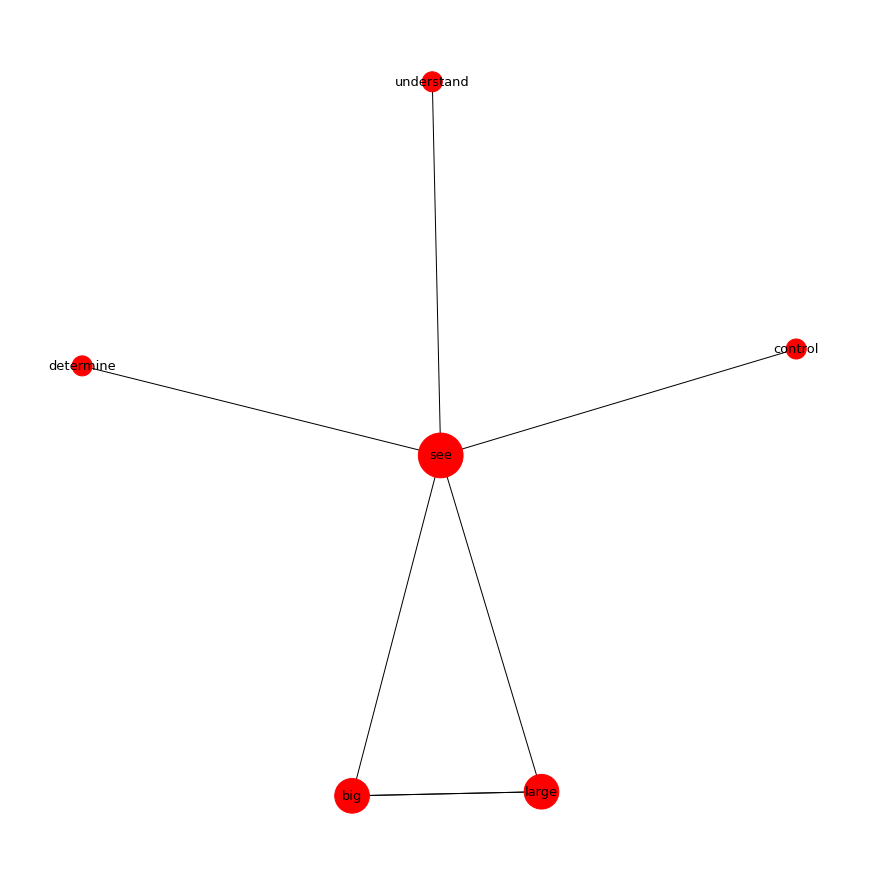

In [ ]:
semantic_enriched_frame(G, 'see')

### (2.f) Topic analysis via community detection. With the community_louvain package, perform a topic analysis via community detection over the knowledge graph from step 2.d. Once you extract the different communities/topics of tightly connected concepts, define a 3rd function topic_visualiser(network, target) that visualises the community/topic of ”data” in the dataset. Provide some brief comments about the way the community content and structure portray the concept of ”data”: are there common semantic areas between concepts in the community?**

This question requires knowledge of 2.d which I cannot provide. `

**You were asked to join a merchandising project from Hollywood, testing some automatic technologies for
the identification of sentiment in movie reviews. You will work on 2000 movie reviews and use AI to process
them within 1 hour, a considerably shorter time than what would be required by human readers.**



### (3.a) Import the dataset. As shown in the labs, use nltk to import the movie_reviews dataset, which contains 1000 positive reviews and 1000 negative reviews. Given that the dataset is balanced, comment about the baseline accuracy for a random classifier. If you flipped a coin to perform the classification or used a majority rule, which accuracy would you expect?

In [44]:
import nltk
from nltk.corpus import movie_reviews
 

# Total reviews
print ("The total number of reviews is")
print(len(movie_reviews.fileids()))


# Total positive reviews
print ("The total number of positive reviews is")
print (len(movie_reviews.fileids('pos'))) 

# Total negative reviews
print ("The total number of negative reviews is")
print (len(movie_reviews.fileids('neg'))) # Output: 1000

The total number of reviews is
2000
The total number of positive reviews is
1000
The total number of negative reviews is
1000


**Given that the dataset is balanced, comment about the baseline accuracy for a random classifier. If you flipped a coin to perform the classification or used a majority rule, which accuracy would you expect?**

When you evaluate a new machine learning model and end up with an accuracy number or other metric, you need to know if it is meaningful. This is where the accuracy of a classifier becomes important as it gives certainity that the model can perform the task it is designed.

 - Baseline accuracy of a balanced dataset, given the target variable is equally representated is 50%
 
 - If you flip a coin, you might get in the short term biased results, i.e. within 10 flips, you might get 7 heads and 3 tails. However, due to the law of large numbers, the more flips you do (say 100 or 1000 flips), the closer the result will be 5 heads and 5 tails (50%)

 - Majority rule is a method used in ensemble machine learning where they crowd source multiple classifiers with the goal of improving accuracy. We cannot say for certain what we would happen, but strong expirmental research exists that shows majority rule classification techniques improves predicition accuracy in heart disease (Ref 1) diabetes (Ref 2) and Twitter Sentiment Analysis (Ref 3)

- How to choose the best accuracy threshold: The role of a data scientist is to improve and optimize performance, but the risk and decision to deploy or operationalize any model at any accuracy is always done in collaboration with the business. The data scientist might make recommendations but ultimately, they need to highlight any potential flaws or risks with certain techniques.


Reference 1: https://www.sciencedirect.com/science/article/pii/B9780128153703000086
Reference 2: https://www.sciencedirect.com/science/article/pii/B9780128153703000086
Reference 3: http://wordpress.let.vupr.nl/nlpapplications/files/2015/06/WNACP-2015_submission_6.pdf




### (3.b) VADER. Import VADER from nltk and apply it to the raw movie reviews in the dataset. You are not required to perform any text cleaning except for removing end of line characters. Notice that VADER will output a dictionary, with 4 keys, for each movie review. Adding the annotation of the review, use such output for producing a data frame with neg, neu, pos, compound and annotation columns. Test different thresholds for selecting negative or positive reviews and report the highest accuracy obtained in this case. Is it better than the baseline accuracy for this classification task? Report on the main pros and cons for this analysis as if you ere presenting this to your project manager on the Hollywood project.

In [ ]:
import nltk
nltk.download('vader_lexicon') 

# import vaders sentiment analyser
sid = SentimentIntensityAnalyzer()

# create empty list
reviews = []

for fileid  in movie_reviews.fileids():
    tag, filename = fileid.split('/')
    reviews.append((filename, tag, movie_reviews.raw(fileid)))
    
df = pd.DataFrame(reviews, columns=['filename', 'tag', 'text'])

df = df.rename(columns={'tag': 'annotation'})

df.drop('filename', axis=1, inplace=True)

df['score'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df['neg'] = df['score'].apply(lambda score_dict: score_dict['neg'])
df['neu'] = df['score'].apply(lambda score_dict: score_dict['neu'])
df['pos'] = df['score'].apply(lambda score_dict: score_dict['pos'])
df['compound'] = df['score'].apply(lambda score_dict: score_dict['compound'])
df.drop('text', axis=1, inplace=True)

df = df[['neg', 'neu', 'pos', 'compound', 'annotation']]

df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,neg,neu,pos,compound,annotation
0,0.093,0.762,0.145,0.9924,neg
1,0.041,0.866,0.093,0.9160,neg
2,0.098,0.789,0.113,0.7050,neg
3,0.152,0.713,0.136,-0.8481,neg
4,0.077,0.844,0.079,0.6824,neg
...,...,...,...,...,...
1995,0.043,0.718,0.239,0.9995,pos
1996,0.159,0.706,0.134,-0.8976,pos
1997,0.160,0.697,0.143,-0.9810,pos
1998,0.103,0.783,0.114,0.9027,pos


The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 67% Positive, 33% Neutral and 0% Negative. Hence all these should add up to 1.
The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). In the case above, lexicon ratings for andsupercool are 2.9and respectively1.3. The compound score turns out to be 0.75 , denoting a very high positive sentiment

In [ ]:
accuracy = {}
highestaccuracy = 0
besthreshold = 0


for threshold in np.arange(-0.9,1.0,0.1):
    df['posthreshold'] = np.where(df['compound']>=threshold, 'pos', 'neg')
    
    df['accuracy'] = np.where(df['posthreshold'] ==df['annotation'], 1,0)
    
    accuracy[threshold] = (df['accuracy'].mean())
    
  #  print(accuracy)
    if(df['accuracy'].mean()>highestaccuracy):
        besthreshold = threshold
        highestaccuracy = df['accuracy'].mean()
       
print('The highest accuracy is ', highestaccuracy, 'with a threshold of', besthreshold)

The highest accuracy is  0.6685 with a threshold of 0.8999999999999996


**Analysis** Vader did better than the baseline accuracy of 50% with a predictive power of 0.66 at a threshold of 0.89. Although, it is better than basline accuracy, we do not recommend to productionize further without performance improvements in accuracy. This could be done by increasing the amount of training data.

It is important to note that we have identified some concerns with the research approach 

Weakness of the Research overall:
*   Very small dataset used. How would Vader perform if given 100K rows of data?
*   It is only compared with one other Model type (Flair). Given the rapid increase in the amount of sentiment analyzers, it would be prudent to compare with several models such as Bag of Words, Aruna, TextBlob etc.

Apart fronm the research approach, it is important to note the pros and cons of Vader for producing automatic sentiment analysis.

Pros of Vader

*  It works exceedingly well on social media type text, yet readily generalizes to multiple domains
It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
It is fast enough to be used online with streaming data, and
It does not severely suffer from a speed-performance tradeoff


*   List item
*   List item

Limitations of Vader




**Report on the main pros and cons for this analysis as if you were presenting this to your project manager on the Hollywood project.** 


**Pros**


*   Fast (took seconds to produce results versus Flair which took >30mins)
*   It is very adaptable to analyzing the biggest source of text data (i.e. social media data), able to interpret slang for example.
*   List item
*   List item


Cons


*   Does not recognize context
*   Vader can miss important words due to small gramatical or spelling errors
*   List item
*   List item












### (3.c) FLAIR. FLAIR is a lightweight NLP processor based on distillBERT that can identify sentiment polarity  with a given degree of confidence (ranging between 0 and 1). You will have to transform each movie review into a Sentence class and then apply the flair predictor to it. Notice that it can take between 30 minutes and 1 hour for processing all the reviews. Compare this time with the one required by VADER. Build a data frame using the outputs of FLAIR, including value and confidence together with the annotation of the movie review. Test different thresholds for selecting positive and negative movie reviews and report the highest accuracy obtained in this case. Do you notice any improvement or enhancement over VADER? Briefly outline how VADER and FLAIR work as if you were presenting them to your project manager on the Hollywood project**

In [ ]:
#! pip install flair
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')


2022-01-10 17:31:25,809 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:

doc = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        doc.append((movie_reviews.raw(fileid).replace('/n', ''), category))
        
 # create a dataframe with Flair's output.       
df1 = pd.DataFrame(columns=['value', 'confidence', 'annotation'])
for review in doc:
    sentence=Sentence(review[0])
    classifier.predict(sentence)
    reviews=sentence.labels[0].to_dict()
    reviews.update({'annotation': review[1]})
    df1=df1.append(reviews, ignore_index=True)

In [46]:
df1 = pd.read_csv('Flair.csv')

In [50]:
df1 = pd.read_csv('Flair.csv')
df1

,Unnamed: 0,value,confidence,annotation
0,0,NEGATIVE,0.999981,neg
1,1,NEGATIVE,0.999994,neg
2,2,NEGATIVE,0.999974,neg
3,3,NEGATIVE,0.999381,neg
4,4,NEGATIVE,0.999683,neg
...,...,...,...,...
1995,1995,POSITIVE,0.999920,pos
1996,1996,POSITIVE,0.997825,pos
1997,1997,POSITIVE,0.999956,pos
1998,1998,POSITIVE,0.999975,pos


In [51]:
df1['confidence2'] = np.where(df1['value'] == 'POSITIVE', df1['confidence'], -(df1['confidence']))



In [52]:
df1

,Unnamed: 0,value,confidence,annotation,confidence2
0,0,NEGATIVE,0.999981,neg,-0.999981
1,1,NEGATIVE,0.999994,neg,-0.999994
2,2,NEGATIVE,0.999974,neg,-0.999974
3,3,NEGATIVE,0.999381,neg,-0.999381
4,4,NEGATIVE,0.999683,neg,-0.999683
...,...,...,...,...,...
1995,1995,POSITIVE,0.999920,pos,0.999920
1996,1996,POSITIVE,0.997825,pos,0.997825
1997,1997,POSITIVE,0.999956,pos,0.999956
1998,1998,POSITIVE,0.999975,pos,0.999975


In [54]:
acc2 = {}
besthres = 0
highestacc= 0


# create a for loop that runs through all the values between -0.9 to 1
for t in np.arange(-0.9,1.0,0.1):
    df1['posthres'] = np.where(df1['confidence2']>=t, 'pos', 'neg')
    
    df1['accuracy'] = np.where(df1['posthres'] ==df1['annotation'], 1,0)
    
    acc2[t] = (df1['accuracy'].mean())

  #print(acc2)
    
   
    if(df1['accuracy'].mean()>highestacc):
        besthres= t
        highestacc = df1['accuracy'].mean()
       
print('The highest accuracy is ', highestacc, 'with a threshold of', besthres)

The highest accuracy is  0.8465 with a threshold of -0.9


**Analysis** 

Flair produced a score of 0.84 at a threshold of -0.09 which was much better than Vader. This accuracy score is much closer to productionable levels as it gives confidence that more than 8 times out of 10 it will correctly predict the sentiment of a piece of text. 

That said, Flair would not be appropiate for real-time sentiment analytics without significant investment in augmented machine power via cloud services potentially as it is computational quite expensive to run. 

**Metholody of Vader**
 
*   VADER which stands for Valence Aware Dictionary for Sentiment Reasoning was developed by C.H. Gilbert and outlined in the research paper( “Vader: A parsimonious rule-based model for sentiment analysis of social media text,” in 2016. 
*  It was designed to provide text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 
*  VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text. 
*   For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”


**Methodology of Flair**


*   Flair is a simple natural language processing (NLP) library developed and open-sourced by Zalando Research. Flair’s framework builds directly on PyTorch, one of the best deep learning frameworks out there. The Zalando Research team has also released several pre-trained models for the following NLP task

*   Name-Entity Recognition (NER): It can recognise whether a word represents a person, location or names in the text. Parts-of-Speech Tagging (PoS): Tags all the words in the given text as to which “part of speech” they belong to. Text Classification: Classifying text based on the criteria (labels) Training Custom Models: Making our own custom models

*   Text embeddings are a form of word representation in NLP in which synonymically similar words are represented using similar vectors which when represented in an n-dimensional space will be close to each other.

*   Embedding based python packages use this form of text representation to predict text sentiments. This leads to better text representation in NLP and yields better model performance. One of such packages is Flair.  It provided various functionalities such as: pre-trained sentiment analysis models,  text embeddings, NER, and more.

